<a href="https://colab.research.google.com/github/saranyabandaru91/Projects_DataScience/blob/main/MLproject_BankData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification on Bank Marketing Data

**Dataset**:https://archive.ics.uci.edu/dataset/222/bank+marketing





Dataset Description:
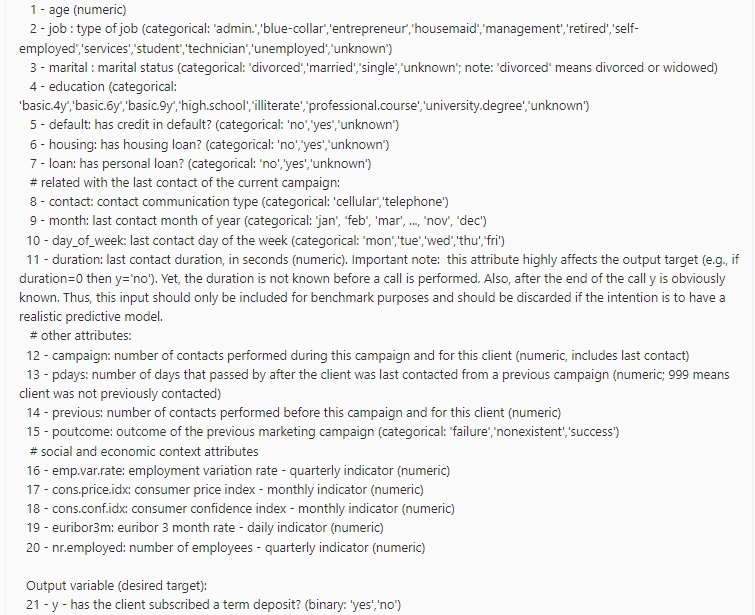

**Problem Statement**: To predict if the client will subscribe (yes/no) a term deposit (variable y)



Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Reading the dataset

In [2]:
data = pd.read_csv('BankMarketingData.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Statistical information of the 'int' type columns

In [3]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


General information about the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Checking the shape of the dataset

In [ ]:
data.shape

(41188, 21)

Checking the columns of the dataset

In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Dropping the duration column

In [5]:
data=data.drop('duration',axis=1)

Checking the number of values for the target variable

In [6]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

Checking for null values

In [ ]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There are no null values present

# **EDA- Basic visualisations , Univariate , Bivariate and Multivariate analysis**


1. Countplot to visualize the target variable

<Axes: xlabel='y', ylabel='count'>

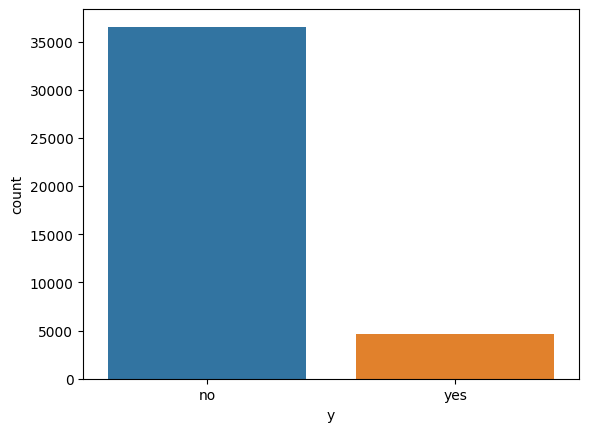

In [ ]:
sns.countplot(data,x="y")

Clearly, this data is imbalanced i.e one class label(no) has a very high number of observations and the other(yes) has a very low number of observations. In such cases our classifier will give biased results , hence inappropriate model.
(Choose appropriate eval metric-F1 score)

2.Histogram subplots

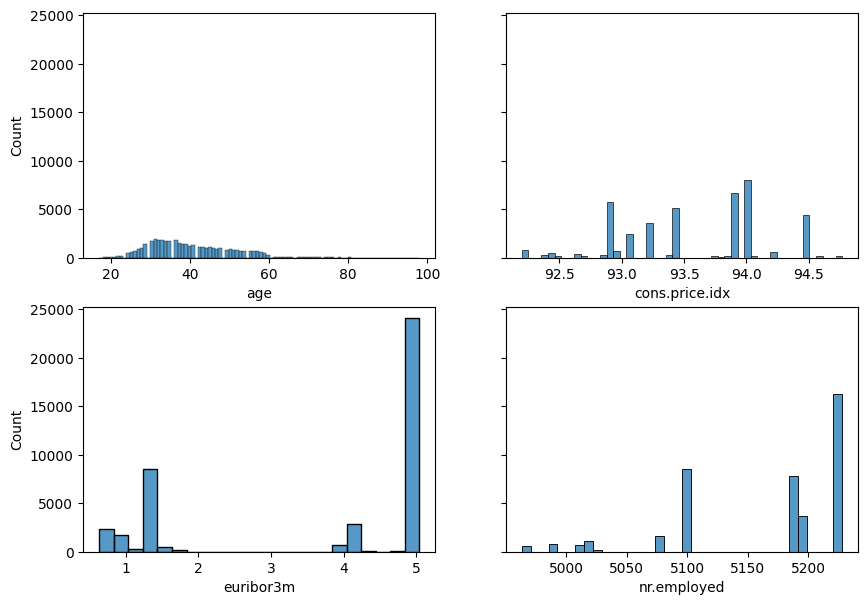

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(10, 7), sharey=True)

sns.histplot(data , x='age',ax=axes[0,0])
sns.histplot(data,x="cons.price.idx" ,ax=axes[0,1])
sns.histplot(data, x="euribor3m" , ax=axes[1,0])
#axes[1,0].set_title("euribor")
sns.histplot(data, x="nr.employed" , ax=axes[1,1])
plt.show()

Checking the distributions of some numerical features using histogram subplots

Text(0.5, 1.0, 'Client has subscribed a term deposit')

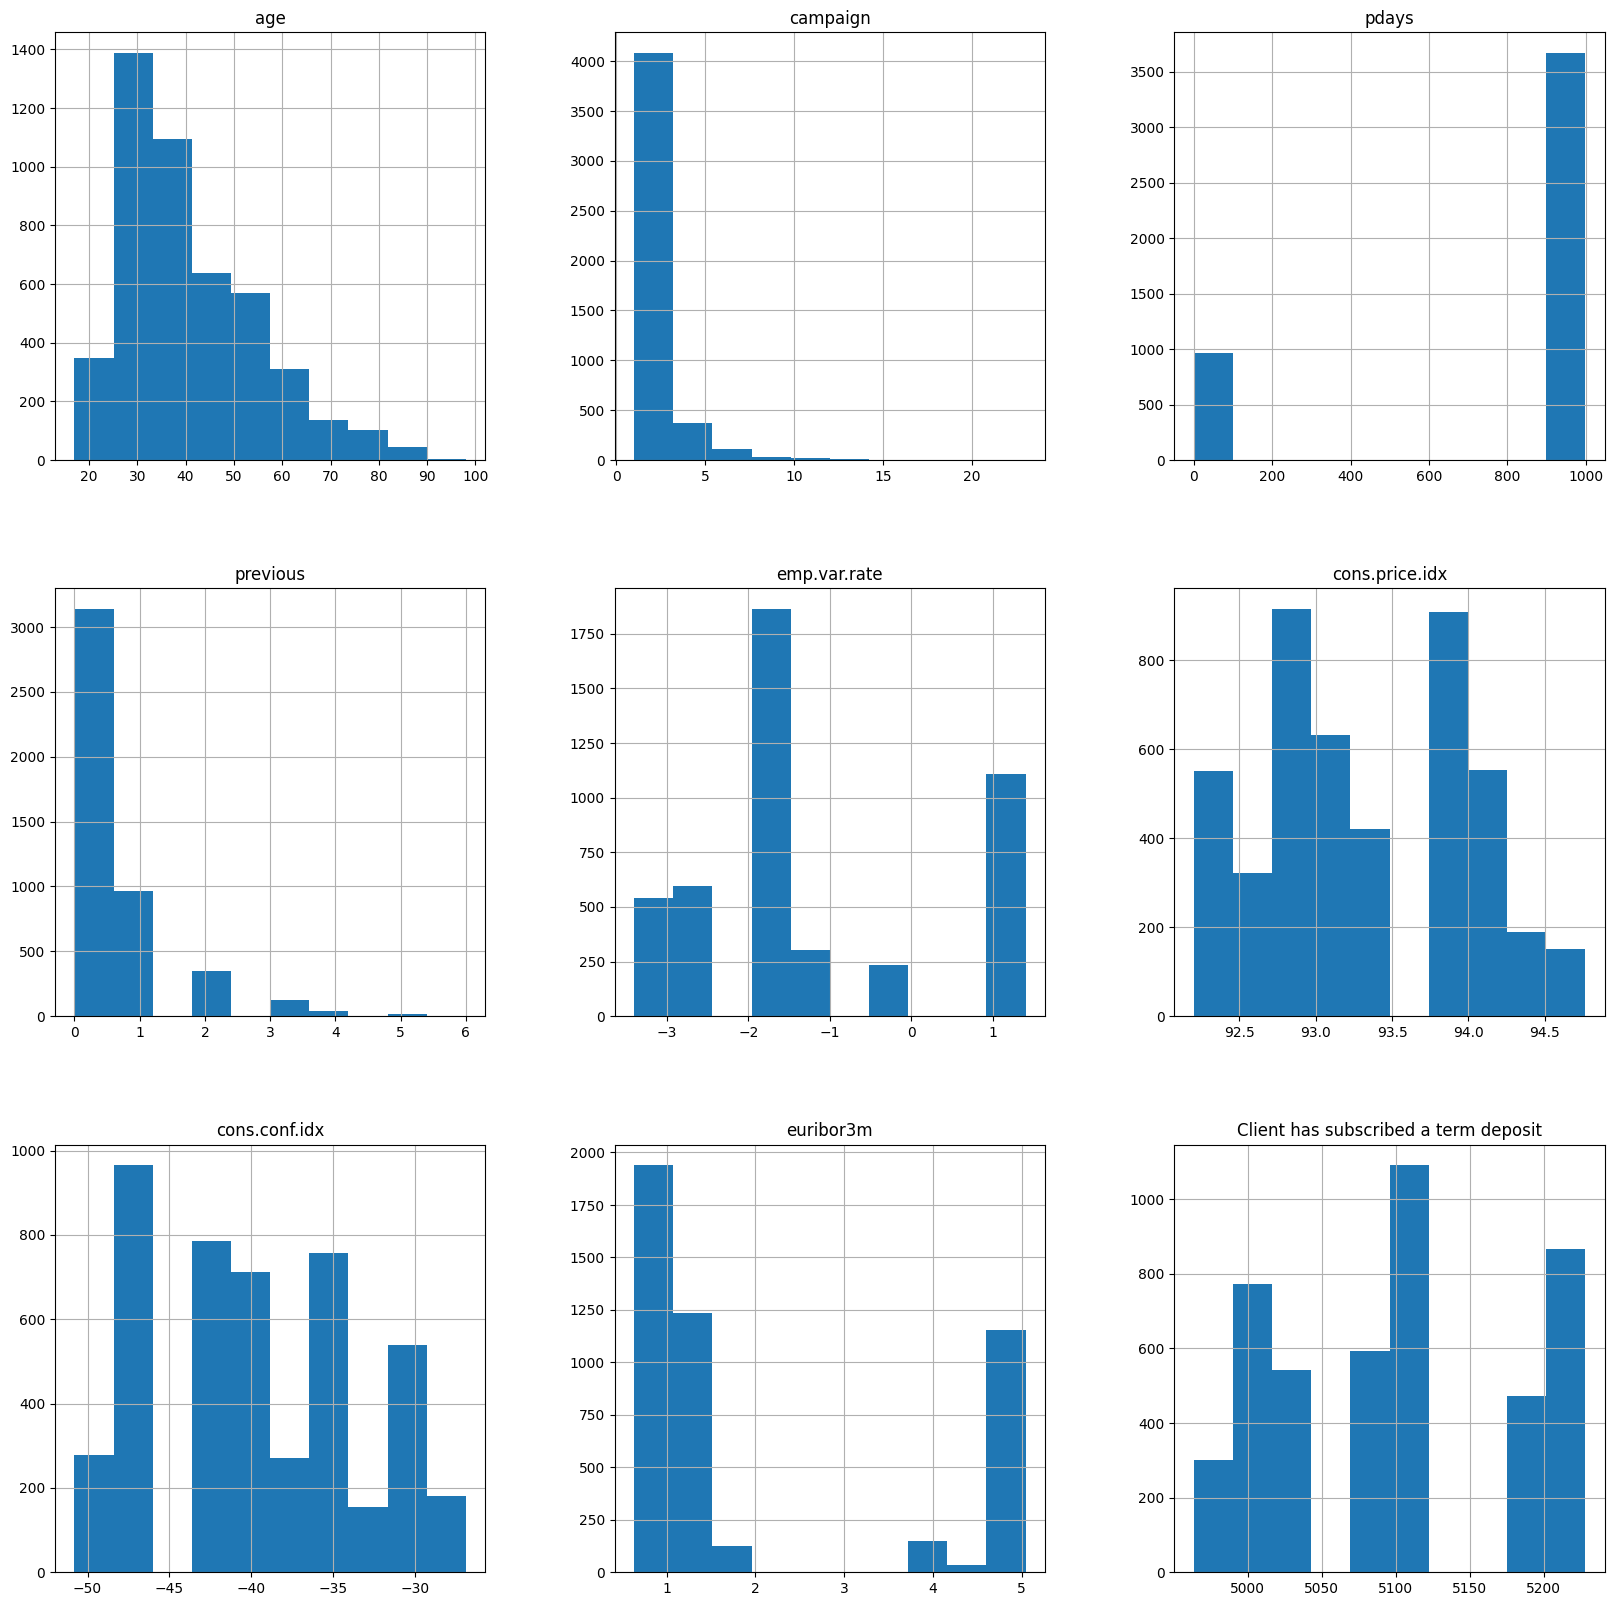

In [ ]:
data[data['y'] == 'yes'].hist(figsize = (20,20))
plt.title('Client has subscribed a term deposit')

Text(0.5, 1.0, 'Client has not subscribed a term deposit')

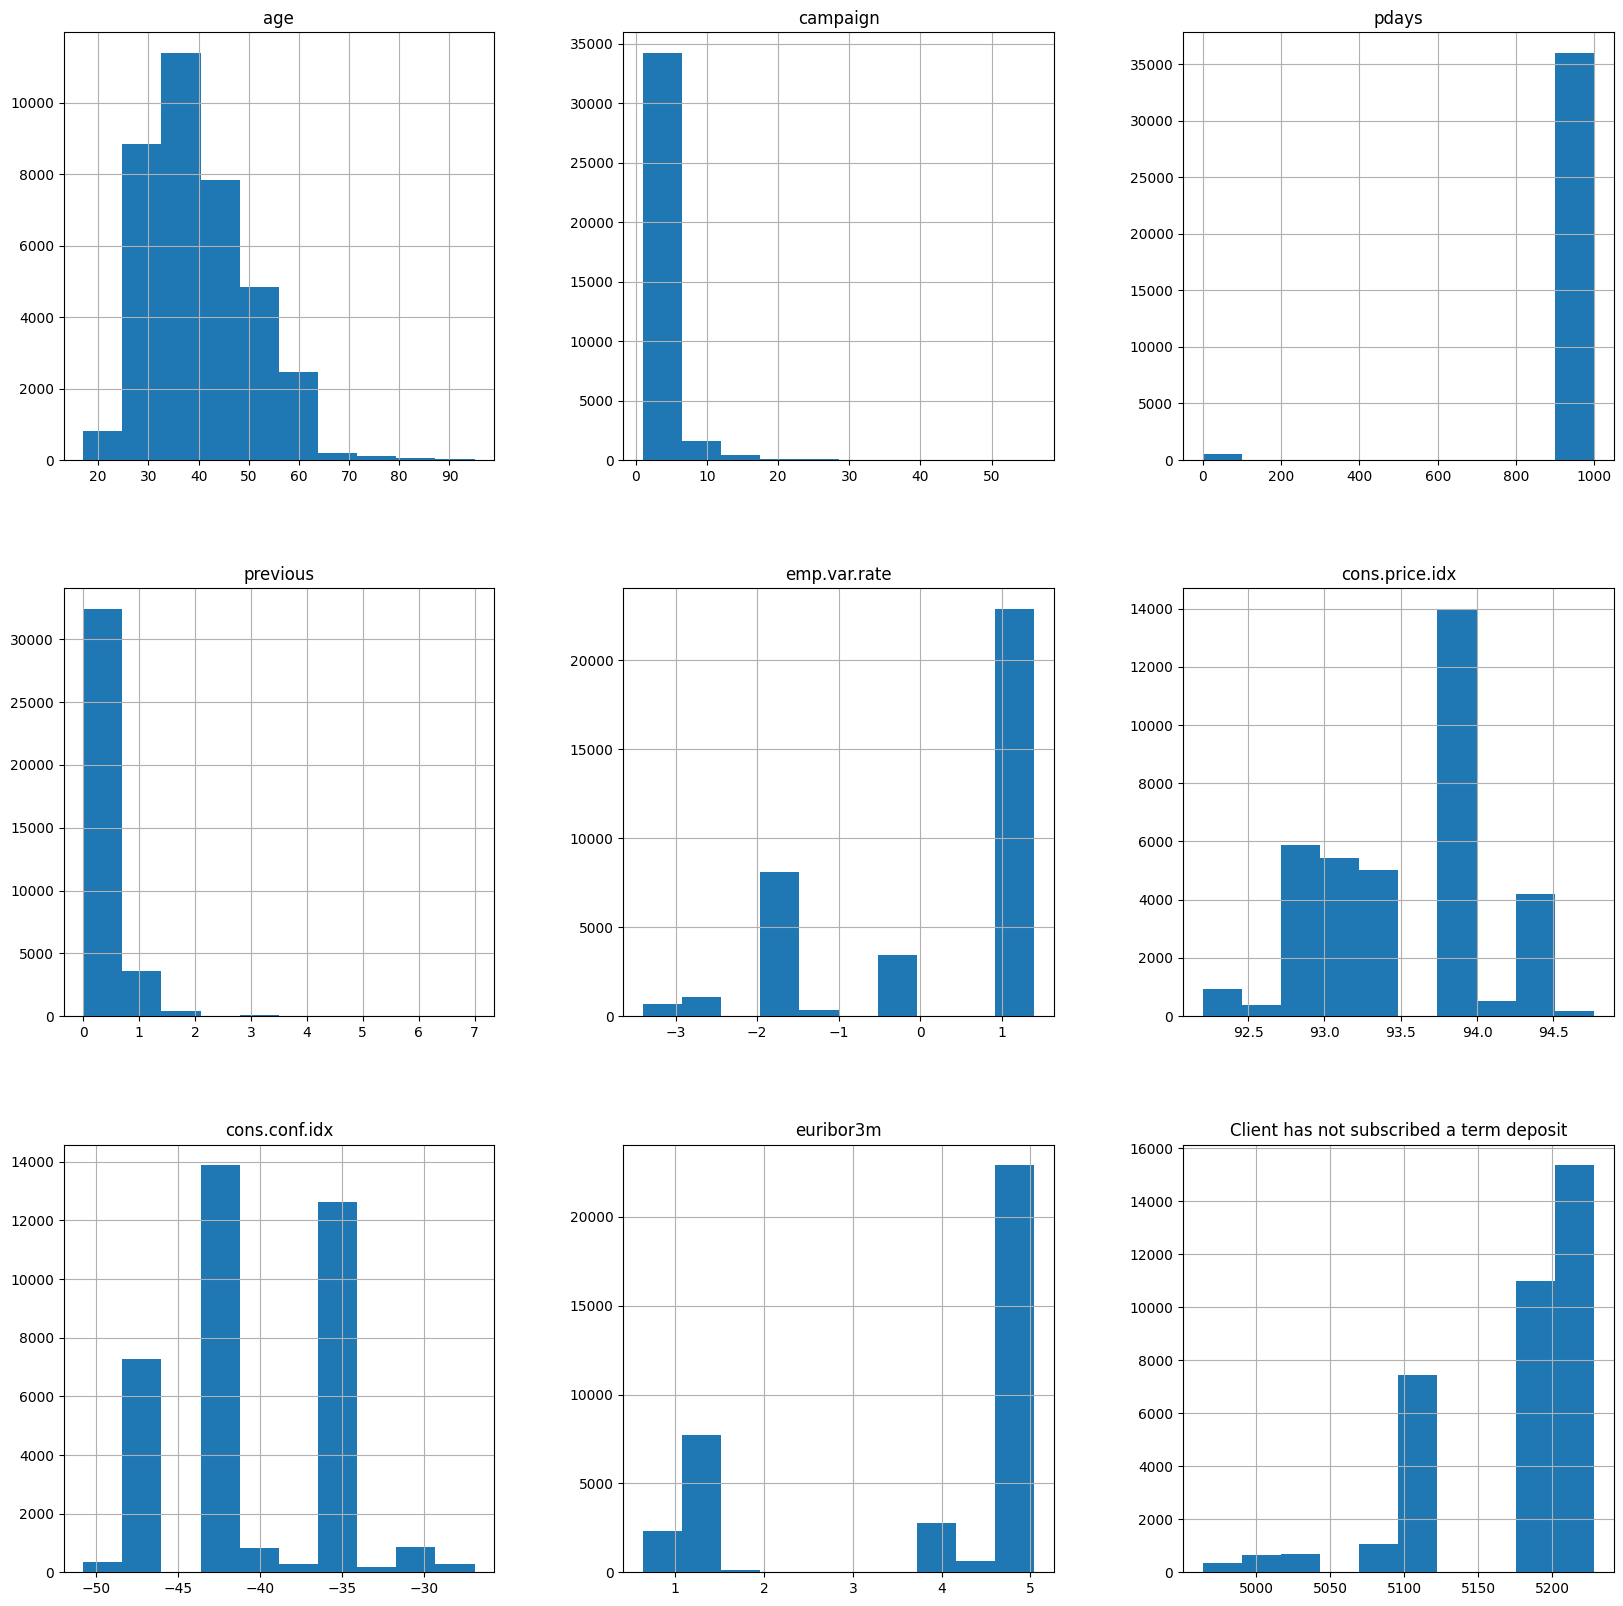

In [ ]:
data[data['y'] == 'no'].hist(figsize = (20,20))
plt.title('Client has not subscribed a term deposit')

3.Visualizing the categorical columns with Pie-Charts

<ipython-input-47-87f85c824d6e>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((2,3),(0,0))
<ipython-input-47-87f85c824d6e>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((2,3),(0,1))
<ipython-input-47-87f85c824d6e>:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((2,3),(0,2))
<ipython-input-47-87f85c824d6e>:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((2,3),(1,0))
<ipython-input-47-

<function matplotlib.pyplot.show(close=None, block=None)>

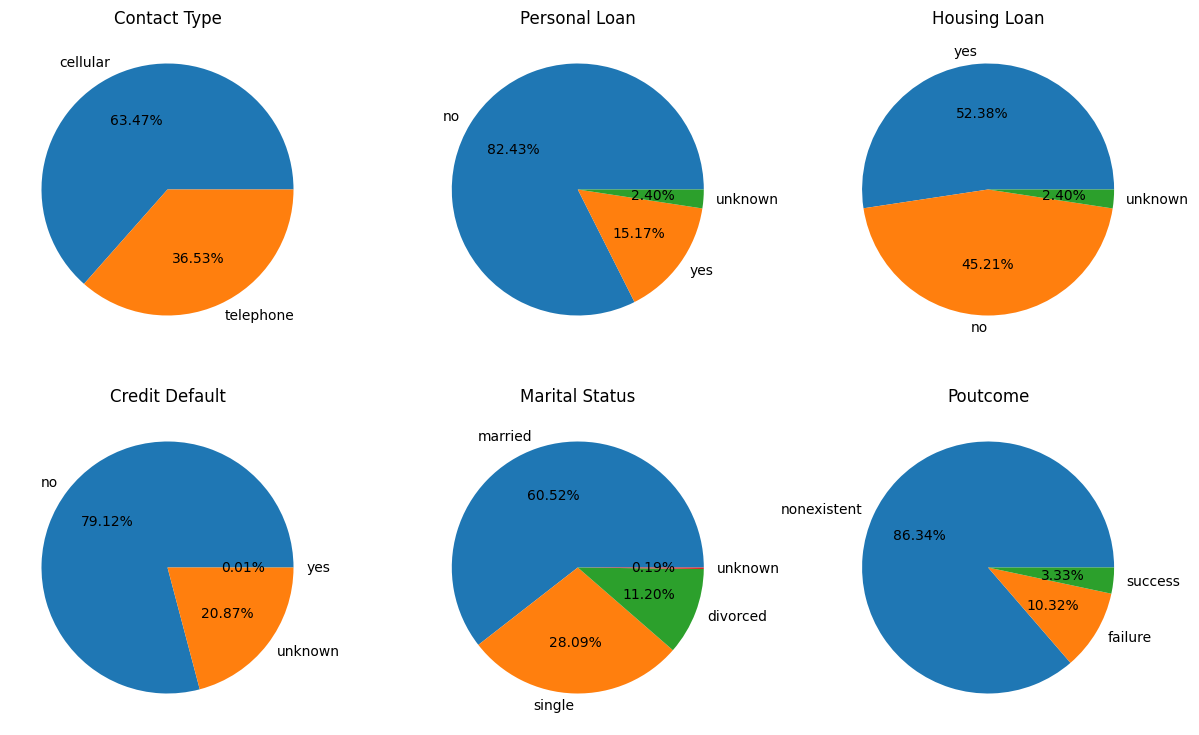

In [ ]:
fig, axes = plt.subplots(2,3,figsize=(15,9), sharey=True)

X1= data['contact'].value_counts().values
ax1 = plt.subplot2grid((2,3),(0,0))
plt.pie(X1,labels=data['contact'].value_counts().index, autopct = '%1.2f%%' )
plt.title("Contact Type")

X4=data['loan'].value_counts().values
ax1 = plt.subplot2grid((2,3),(0,1))
plt.pie(X4,labels=data['loan'].value_counts().index, autopct = '%1.2f%%')
plt.title("Personal Loan")

X5=data['housing'].value_counts().values
ax1 = plt.subplot2grid((2,3),(0,2))
plt.pie(X5,labels=data['housing'].value_counts().index, autopct = '%1.2f%%')
plt.title("Housing Loan")

X6=data['default'].value_counts().values
ax1 = plt.subplot2grid((2,3),(1,0))
plt.pie(X6,labels=data['default'].value_counts().index, autopct = '%1.2f%%')
plt.title("Credit Default")

X7=data['marital'].value_counts().values
ax1 = plt.subplot2grid((2,3),(1,1))
plt.pie(X7,labels=data['marital'].value_counts().index, autopct = '%1.2f%%')
plt.title("Marital Status")

X8=data['poutcome'].value_counts().values
ax1 = plt.subplot2grid((2,3),(1,2))
plt.pie(X8,labels=data['poutcome'].value_counts().index, autopct = '%1.2f%%')
plt.title("Poutcome")
#axes.legend(data['poutcome'].value_counts().index,loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

plt.show

<ipython-input-48-481e91fa6ed9>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,2),(0,0))
<ipython-input-48-481e91fa6ed9>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,2),(0,1))


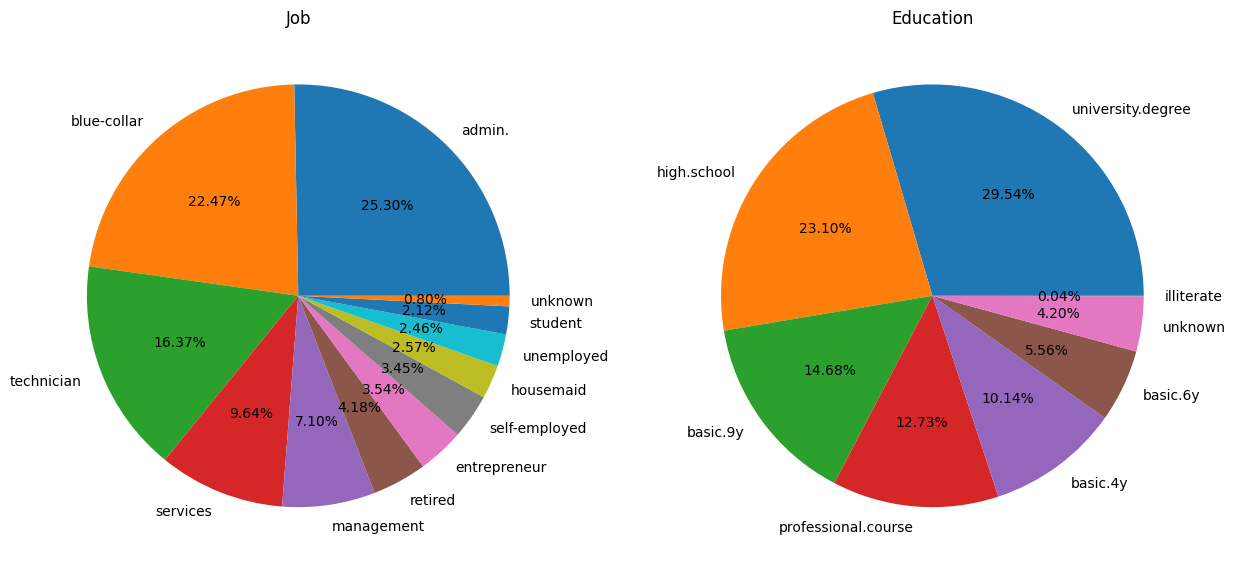

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,9), sharey=True)

X3=data['job'].value_counts().values
ax1 = plt.subplot2grid((1,2),(0,0))
plt.pie(X3,labels=data['job'].value_counts().index, autopct = '%1.2f%%')
plt.title("Job")
#axes.legend(data['job'].value_counts().index,loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))


X2=data['education'].value_counts().values
ax1 = plt.subplot2grid((1,2),(0,1))
plt.pie(X2,labels=data['education'].value_counts().index, autopct = '%1.2f%%')
plt.title("Education")

plt.show()

4. Grid plot using FacetGrid

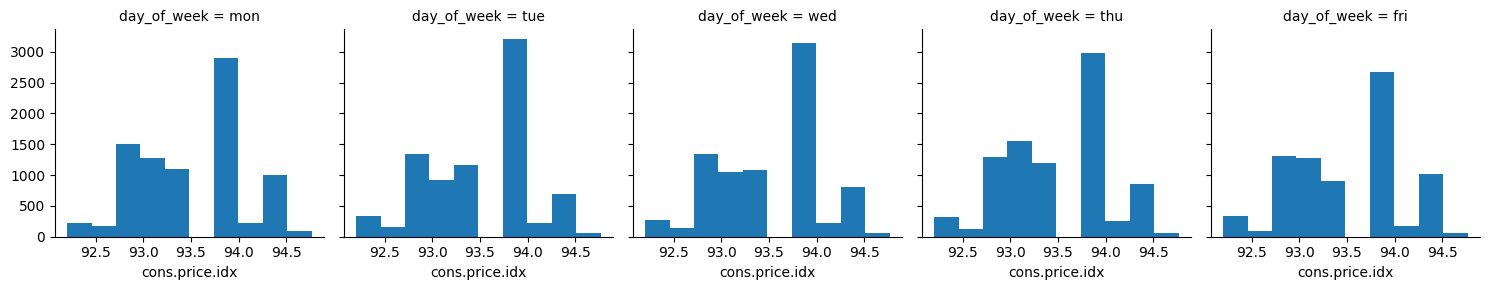

In [ ]:
#g = sns.FacetGrid(data, col="day_of_week",  row="y", hue='loan')
#g = g.map(plt.hist, "cons.price.idx")
g = sns.FacetGrid(data, col="day_of_week")
g = g.map(plt.hist, "cons.price.idx",bins=10)

Figure describing how the consumer price index is varying based on the days of the week

5. Violinplots and strip plots

<Axes: xlabel='education', ylabel='nr.employed'>

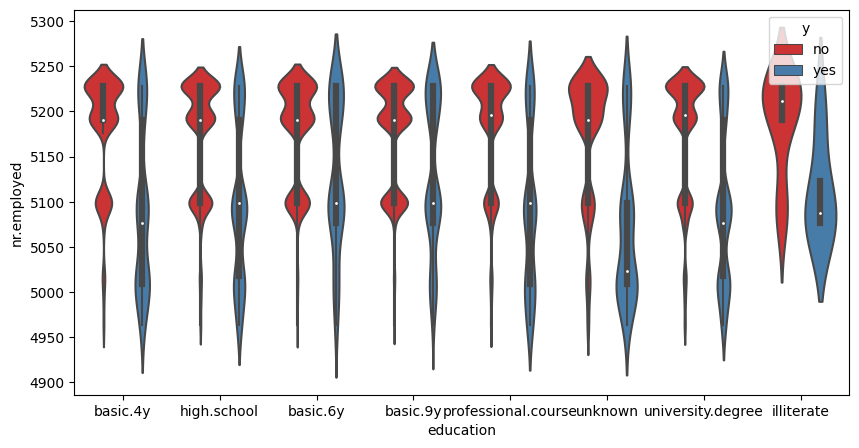

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.violinplot(x="education",y="nr.employed", hue='y',data=data , palette='Set1')

Checking the distribution of the features - education wrt the number of employees- and classifying based off of the target variable using violin plot

<Axes: xlabel='job', ylabel='age'>

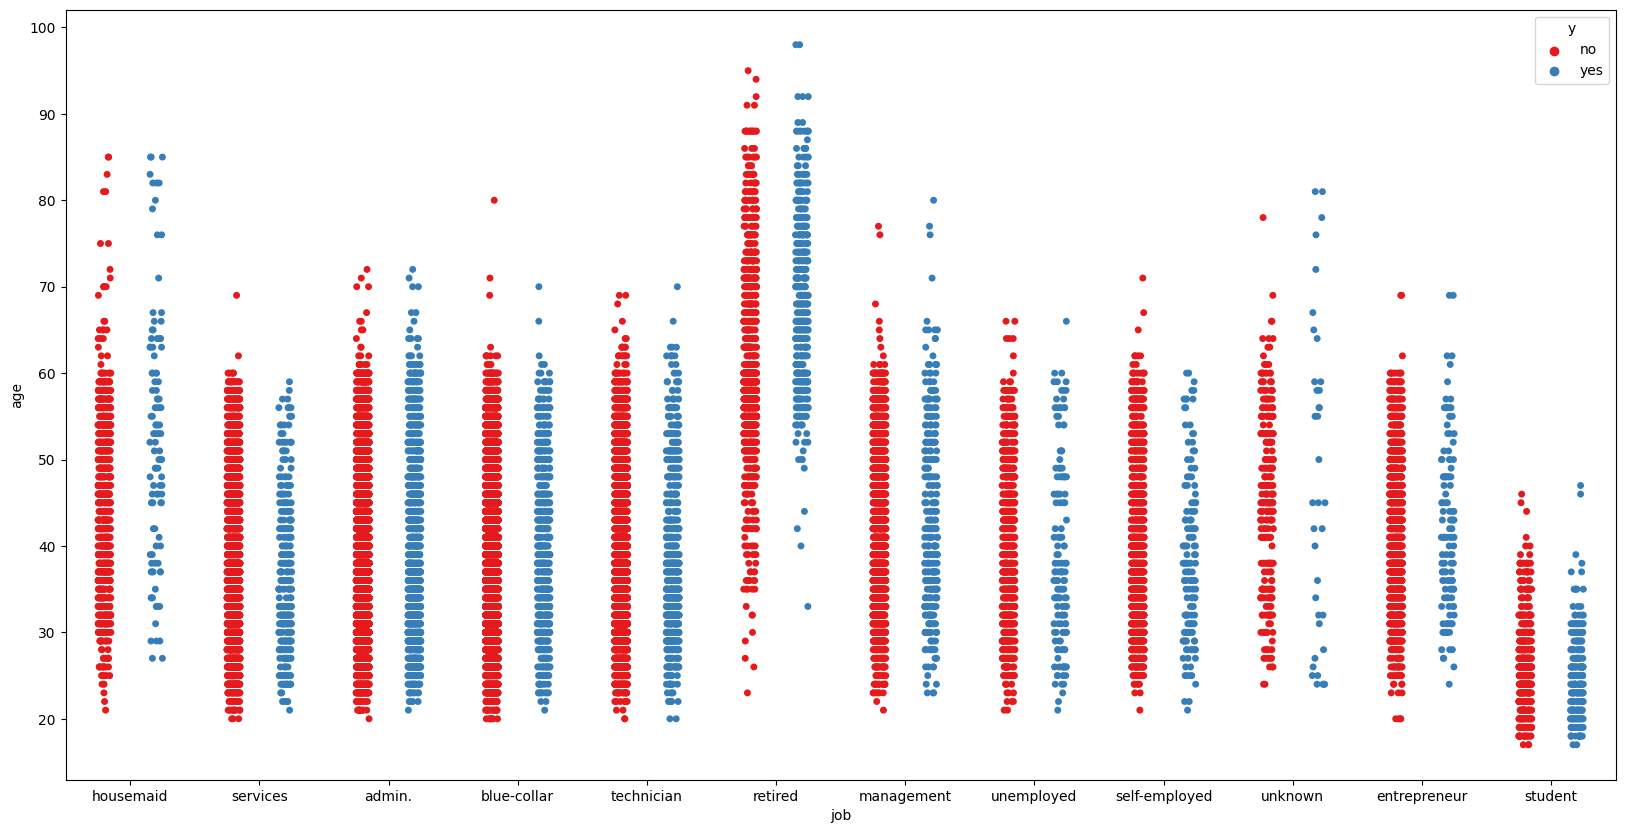

In [ ]:
fig = plt.figure(figsize=(20,10))
sns.stripplot(x="job", y="age", data= data, jitter = True, hue='y', palette='Set1',dodge = True)

6. Boxplots

<Axes: xlabel='emp.var.rate'>

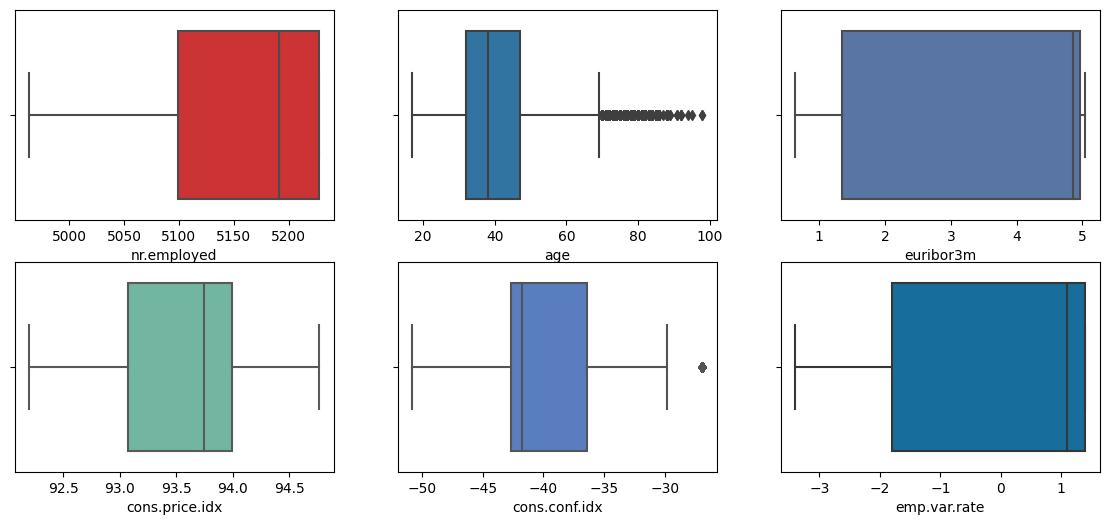

In [ ]:
fig, axes = plt.subplots(2,3,figsize=(14,6), sharey=True)
sns.boxplot(data,x="nr.employed",ax=axes[0,0],palette='Set1')
sns.boxplot(data,x="age",ax=axes[0,1])
sns.boxplot(data,x="euribor3m",ax=axes[0,2] , palette='deep')
sns.boxplot(data,x="cons.price.idx",ax=axes[1,0], palette='Set2')
sns.boxplot(data,x="cons.conf.idx",ax=axes[1,1], palette='muted')
sns.boxplot(data,x="emp.var.rate",ax=axes[1,2], palette='colorblind')

Checking for outliers in the numercial variables. The 'age' column has the maximum number of outliers

<Figure size 2000x1000 with 0 Axes>

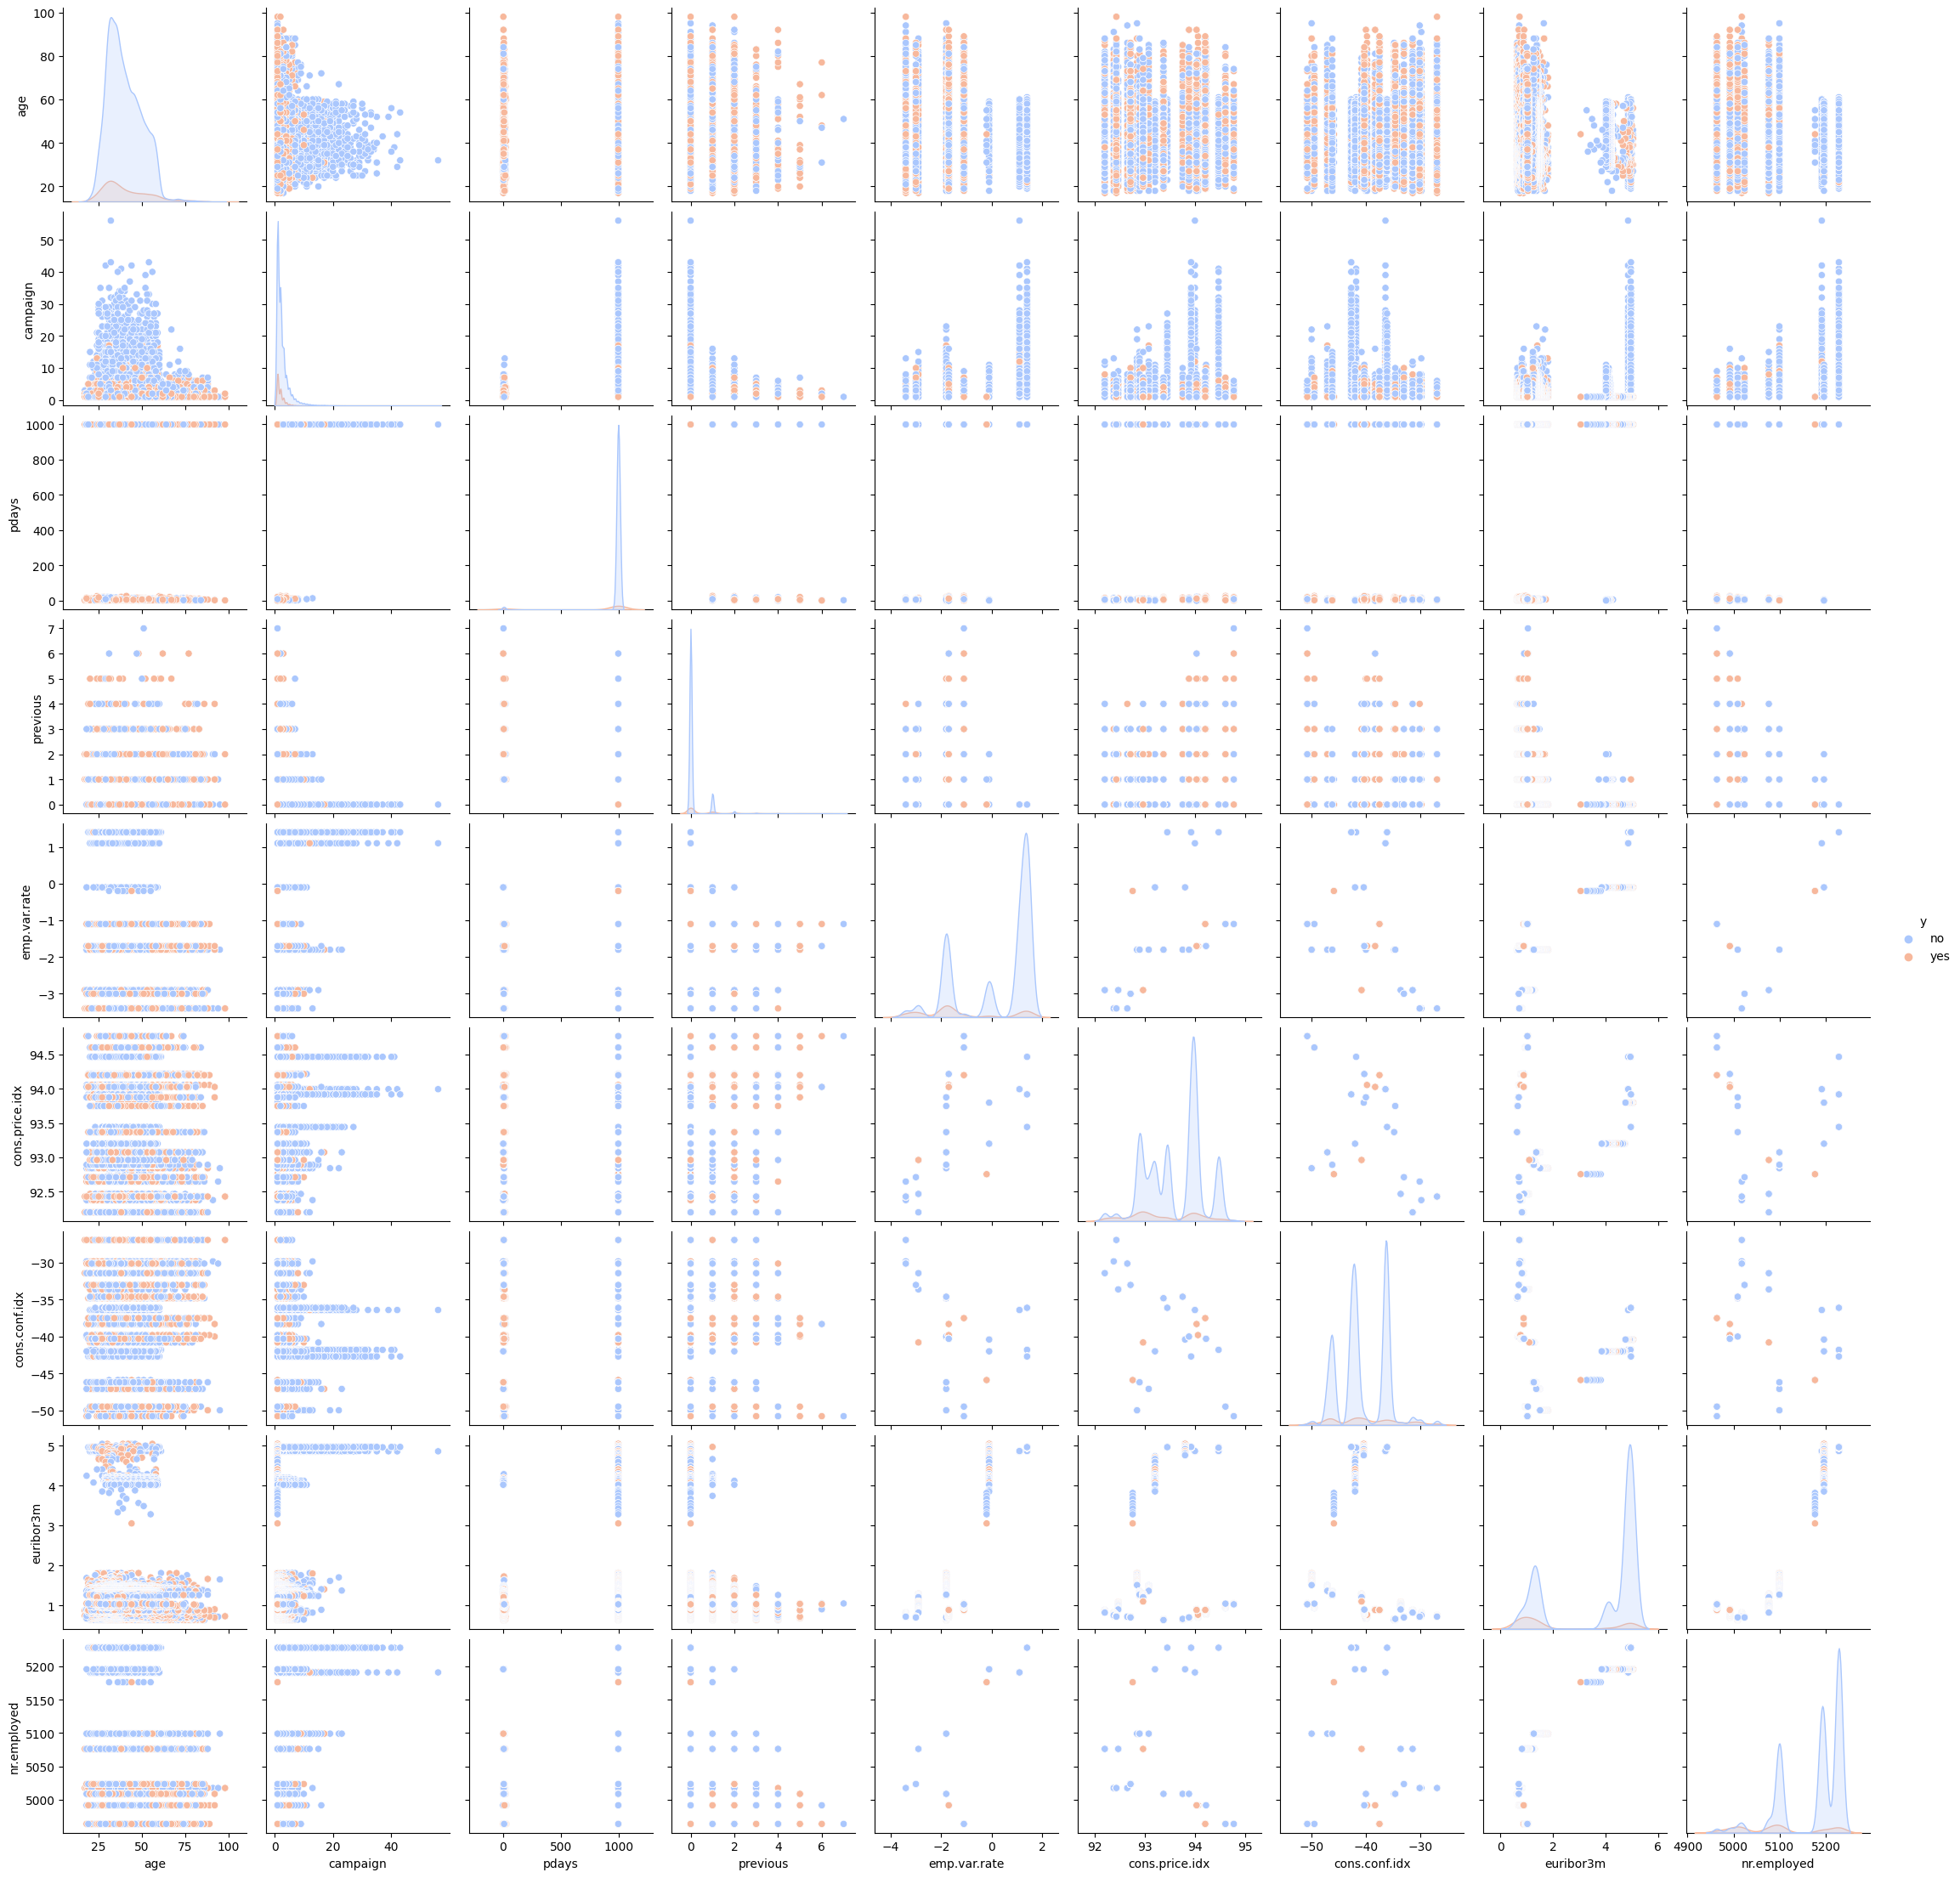

In [ ]:
fig = plt.figure(figsize=(20,10))
sns.pairplot(data,hue='y',palette='coolwarm')

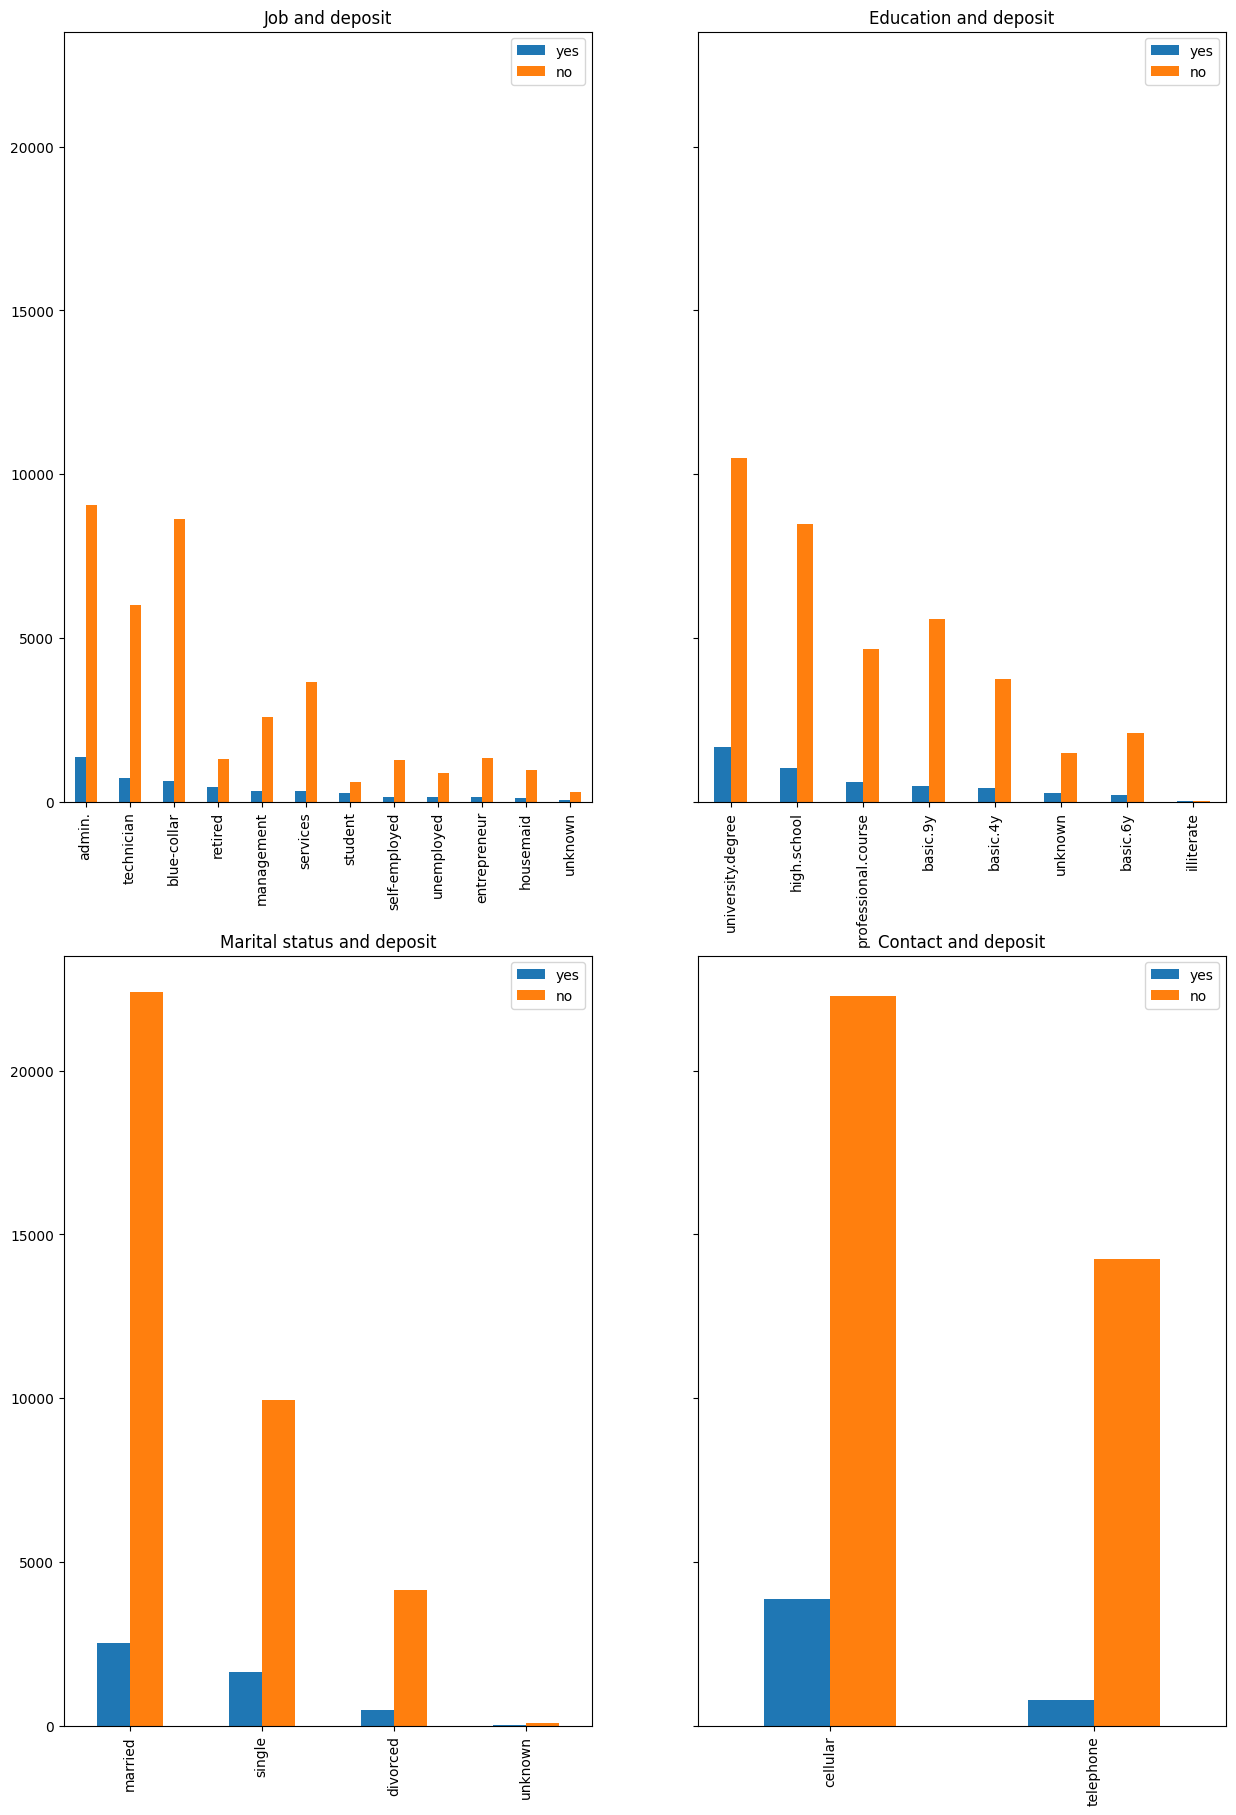

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(15,22), sharey=True)

j_df1 = pd.DataFrame()
j_df1['yes'] = data[data['y'] == 'yes']['job'].value_counts()
j_df1['no'] = data[data['y'] == 'no']['job'].value_counts()
j_df1.plot.bar(title = 'Job and deposit', ax=axes[0,0])

j_df2 = pd.DataFrame()
j_df2['yes'] = data[data['y'] == 'yes']['education'].value_counts()
j_df2['no'] = data[data['y'] == 'no']['education'].value_counts()
j_df2.plot.bar(title = 'Education and deposit', ax=axes[0,1])

j_df3 = pd.DataFrame()
j_df3['yes'] = data[data['y'] == 'yes']['marital'].value_counts()
j_df3['no'] = data[data['y'] == 'no']['marital'].value_counts()
j_df3.plot.bar(title = 'Marital status and deposit', ax=axes[1,0])

j_df4 = pd.DataFrame()
j_df4['yes'] = data[data['y'] == 'yes']['contact'].value_counts()
j_df4['no'] = data[data['y'] == 'no']['contact'].value_counts()
j_df4.plot.bar(title = 'Contact and deposit', ax=axes[1,1])

plt.show()

Checking the correlations among the features using the heatmap

In [7]:
cor = data.corr()
upper_tri = cor.where(np.triu(np.ones(cor.shape),k=1).astype(np.bool))

<ipython-input-7-4ff087a429a7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()
<ipython-input-7-4ff087a429a7>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor.where(np.triu(np.ones(cor.shape),k=1).astype(np.bool))


<Axes: >

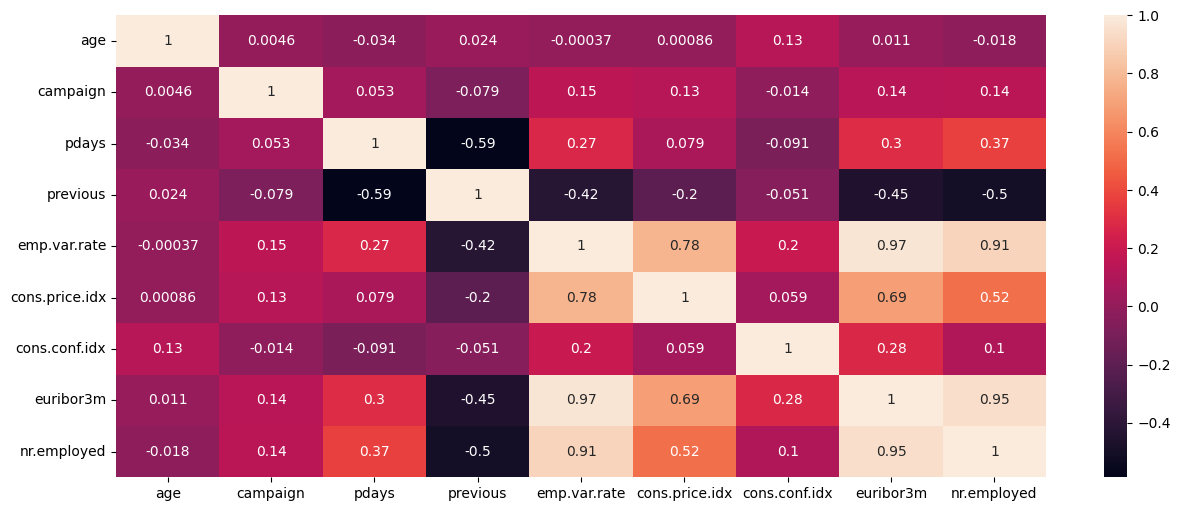

In [8]:

fig = plt.figure(figsize=(15,6))
sns.heatmap(cor,annot=True)

Highly positively correlated features:
We can clearly see from the above heatmap that the feature emp.var.rate is highly correlated with 'euribor3m', 'nr.employed'

In [9]:
def corr(df,thresh):
  col_corr = set()
  for i in range(len(cor.columns)):
    for j in range(i):
      if abs(cor.iloc[i,j])>thresh:
        colname=cor.columns[i]
        col_corr.add(colname)
  return col_corr

In [10]:
correlated_features=corr(data,0.9)
correlated_features

{'euribor3m', 'nr.employed'}

In [11]:
data.drop(correlated_features,axis=1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,yes


The correlated features have been dropped

Understanding the column pdays (highly negatively correlated with previous)

In [12]:
len (data[data['pdays'] == 999] ) / len(data) * 100

96.32174419733903

This shows that 96.32% of clients were not previously contacted.


In [13]:
data.drop('pdays',axis=1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#Feature Engineering
1. Encoding the categorical variables

*   Job and education are `ordinal variables`
*   Contact, housing, loan, poutcome, default, marital status, y, month, day_of_week are all ` nominal variables`



In [14]:
#Ordinal encoding for the education variable
#data['education']=data['education'].map({'university.degree':6, 'high.school':5, 'basic.9y':4, 'professional.course':7,'basic.4y':2, 'basic.6y':3, 'unknown': 0, 'illiterate':1})

In [15]:
#Ordinal encoding for the job variable#
#data['job']=data['job'].map({'admin.':9, 'blue-collar':5, 'technician':8, 'services':6, 'management':10,'retired':3, 'entrepreneur':11, 'self-employed':7, 'housemaid':4, 'unemployed':2,'student':1, 'unknown':0})

In [16]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['y']= label_encoder.fit_transform(data['y'])
data['job']= label_encoder.fit_transform(data['job'])
data['marital']= label_encoder.fit_transform(data['marital'])
data['education']= label_encoder.fit_transform(data['education'])
data['default']= label_encoder.fit_transform(data['default'])
data['housing']= label_encoder.fit_transform(data['housing'])
data['loan']= label_encoder.fit_transform(data['loan'])
data['contact']= label_encoder.fit_transform(data['contact'])
data['month']= label_encoder.fit_transform(data['month'])
data['day_of_week']= label_encoder.fit_transform(data['day_of_week'])
data['poutcome']= label_encoder.fit_transform(data['poutcome'])

In [17]:
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
5,45,7,1,2,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,1,5,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
7,41,1,1,7,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
8,24,9,2,5,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
9,25,7,2,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


2. Feature Scaling using MinMaxScaler (This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.)

In [18]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X= data.drop('y',axis=1)
y = data['y']
X = sc.fit_transform(X)

3. Handling imbalanced data using resampling techniques followed by train test split of the data


Combining both Over sampling and Under sampling using SMOTETomek

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.combine import SMOTETomek

In [26]:
#Resampling uswing SMOTETomek
smt = SMOTETomek(random_state=42)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X, y)

# Splitting the data into training and testing sets after resampling
X_train_smt, X_test_smt, y_train_smt, y_test_smt = train_test_split(X_resampled_smt, y_resampled_smt, test_size=0.2, random_state=42)

## Model Building


*   Cross Validation
*   Hyper parameter tuning





1.   Support Vector Machine with RBF kernel




In [ ]:
svm_model_smt = SVC(kernel='rbf', random_state=42)
svm_model_smt.fit(X_train_smt, y_train_smt)

y_pred_svm_smt = svm_model_smt.predict(X_test_smt)


2.   Random Forest Classifier



In [29]:
rf_model_smt = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_smt.fit(X_train_smt, y_train_smt)

y_pred_rf_smt = rf_model_smt.predict(X_test_smt)

Random Forest Accuracy: 0.9421636615811373




3. Gradient Boosting Classifier



In [31]:
gb_model_smt = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model_smt.fit(X_train_smt, y_train_smt)

y_pred_gb_smt = gb_model_smt.predict(X_test_smt)

Gradient Boosting Accuracy: 0.9015256588072122


## Evaluation metrics

In [32]:
#Import the various evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [33]:
a1=accuracy_score(y_test_smt, y_pred_svm_smt)
a2=accuracy_score(y_test_smt, y_pred_rf_smt)
a3=accuracy_score(y_test_smt, y_pred_gb_smt)

In [34]:
r1=recall_score(y_test_smt, y_pred_svm_smt)
r2=recall_score(y_test_smt, y_pred_rf_smt)
r3=recall_score(y_test_smt, y_pred_gb_smt)

In [35]:
p1=precision_score(y_test_smt, y_pred_svm_smt)
p2=precision_score(y_test_smt, y_pred_rf_smt)
p3=precision_score(y_test_smt, y_pred_gb_smt)

In [36]:
f1=f1_score(y_test_smt, y_pred_svm_smt)
f2=f1_score(y_test_smt, y_pred_rf_smt)
f3=f1_score(y_test_smt, y_pred_gb_smt)

In [37]:
eval_data = {'Accuracy':[a1,a2,a3],'Recall':[r1,r2,r3], 'Precision':[p1,p2,p3], 'f1 score': [f1,f2,f3]}
df_metrics = pd.DataFrame(eval_data, index =['SVM Classifier(RBF)', 'Random Forest Classifier','Gradient Boosting Classifier'])
df_metrics

,Accuracy,Recall,Precision,f1 score
SVM Classifier(RBF),0.756588,0.674875,0.805279,0.734332
Random Forest Classifier,0.942164,0.935031,0.948222,0.941580
Gradient Boosting Classifier,0.901526,0.875070,0.923371,0.898571


## Conclusion

The Random forest classifier is observed to be the best suited model for this given dataset with 94.21% accuracy